In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# load data into dataframes
fb = pd.read_csv('../datasets/fb.csv', index_col='date', parse_dates=True)
eq = pd.read_csv('../datasets/earthquakes.csv')
covid = pd.read_csv('../datasets/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

### Distributions
- histograms
- KDEs (kernel density estimates)
- box plots
- ECDFs (emperical cumulative distribution functions)

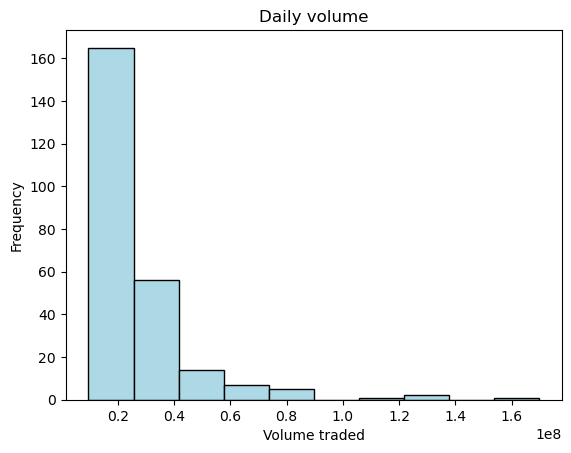

In [6]:
fb.volume.plot(
    kind = 'hist',
    title = 'Daily volume',
    color = 'lightblue',
    edgecolor = 'black'
)
plt.xlabel('Volume traded')
plt.show()

Text(0.5, 0, 'magnitude')

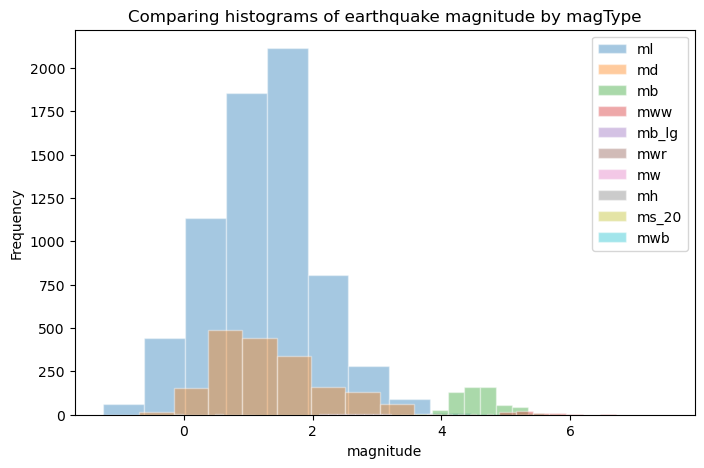

In [8]:
fig, axes = plt.subplots(figsize=(8, 5))

for mt in eq.magType.unique():
    data = eq.query(f'magType == "{mt}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4, 
            label=mt, legend=True,
            title='Comparing histograms of earthquake magnitude by magType',
            edgecolor = 'white'
        )

plt.xlabel('magnitude')

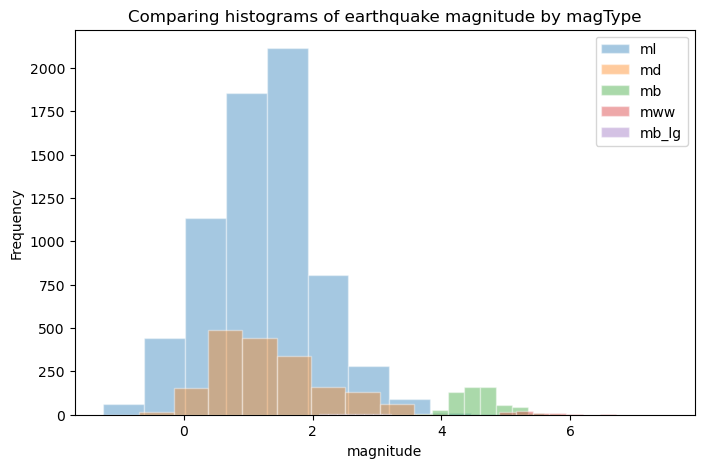

In [15]:
# same but top-5 only
fig, axes = plt.subplots(figsize=(8, 5))
top_magTypes = eq.magType.value_counts()[:5].index
for mt in eq.magType.unique():
    if mt in top_magTypes:
        data = eq.query(f'magType == "{mt}"').mag
        data.plot(
            kind='hist', ax=axes, alpha=0.4, 
            label=mt, legend=True,
            title='Comparing histograms of earthquake magnitude by magType',
            edgecolor = 'white'
        )

plt.xlabel('magnitude')

plt.show()

In [13]:

eq.magType.value_counts()[:5].index


Index(['ml', 'md', 'mb', 'mww', 'mb_lg'], dtype='object')

### KDE

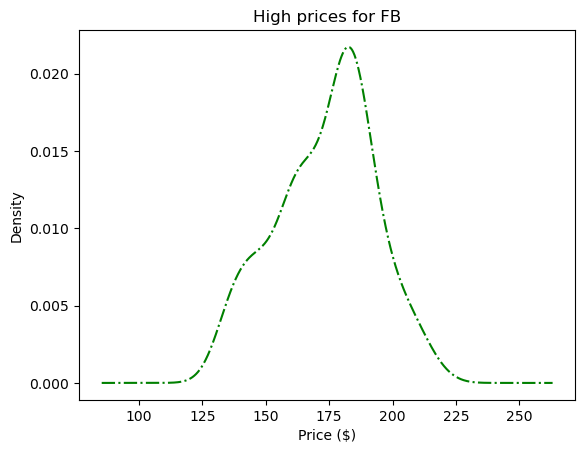

In [21]:
fb.high.plot(
    kind = 'kde',
    title = 'High prices for FB',
    style = '-.g'
)
plt.xlabel('Price ($)')
plt.show()

### Histogram with KDE combined

In [ ]:
ax = fb.high.plot(
    kind = 'hist',
    density
)